# Challenge 1

### Exploratory Data Visualization Charts and Summary Statistics

**In order to analyze the data, first we need to import the relevant libraries:**

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from scipy.stats import ttest_1samp
from scipy import stats

**And create the new DataFrame with the CSV:**

In [36]:
diamonds = pd.read_csv('./data/diamonds_train.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


**Then, we have to figure out what kind of information we are dealing with. We will use methods as .info(), .describe() or .unique() to understand this DataFrame:**

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [39]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


**There are a few different cuts:**

In [41]:
diamonds['cut'].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

**There are different colors:**

In [42]:
diamonds['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

**Similar to before, there are different measures of clarity, I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF:**

In [59]:
diamonds['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

**We can create new columns for future analysis:**

In [62]:
diamonds['area'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,area
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975


In [68]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds['carat_bin'] = pd.cut(diamonds['carat'], bins)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,area,carat_bin
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725,"(1.0, 1.5]"
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750,"(0.0, 0.5]"
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890,"(0.5, 1.0]"
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800,"(0.0, 0.5]"
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975,"(1.0, 1.5]"


### Graphs and analysis

**First of all; let's see the correlations between the different columns for a better understanding of the table. 
Price is highly positively correlated with Carat and the dimensions of the diamonds.**

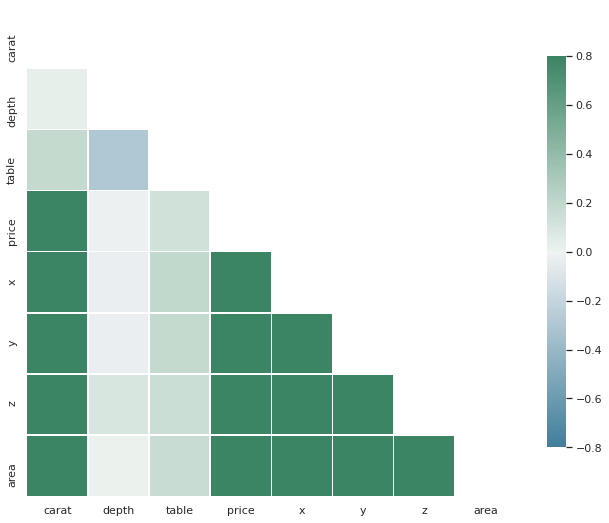

In [119]:
sns.set_theme(style="white")
corr = diamonds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 150, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show()

**Lots of outliers with large prices, while most of them are between 1000 and 5000**

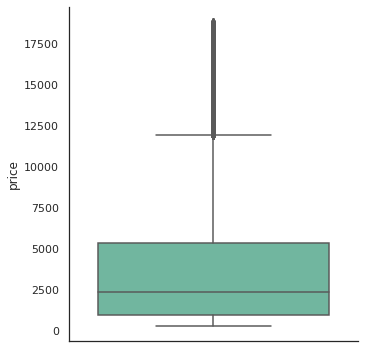

In [103]:
sns.catplot( y='price', kind='box', data=diamonds, height=5, palette='BuGn');

In [71]:
prices.describe()

,price
count,40455.000000
mean,3928.444469
std,3992.416147
min,326.000000
25%,945.000000
50%,2397.000000
75%,5331.000000
max,18823.000000


**Same with carats, most are below 1 carat and outliers above 2 carats:**

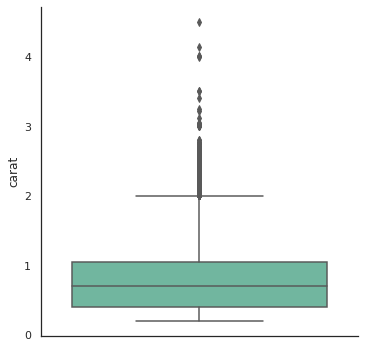

In [104]:
sns.catplot( y='carat', kind='box', data=diamonds, height=5, palette='BuGn');

In [23]:
carat.describe()

,carat
count,40455.000000
mean,0.797706
std,0.475544
min,0.200000
25%,0.400000
50%,0.700000
75%,1.040000
max,4.500000


**There is a lot of dispersion, although a logic trend can be seen:
The higher the carat, the more expensive.
This dispersion increases as it does the carat size.**

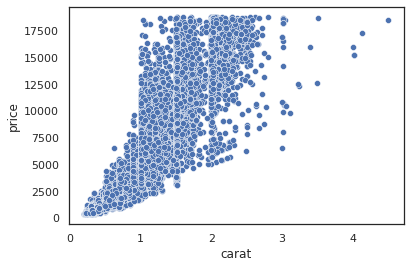

In [127]:
sns.scatterplot(x = 'carat', y ='price', data=diamonds);

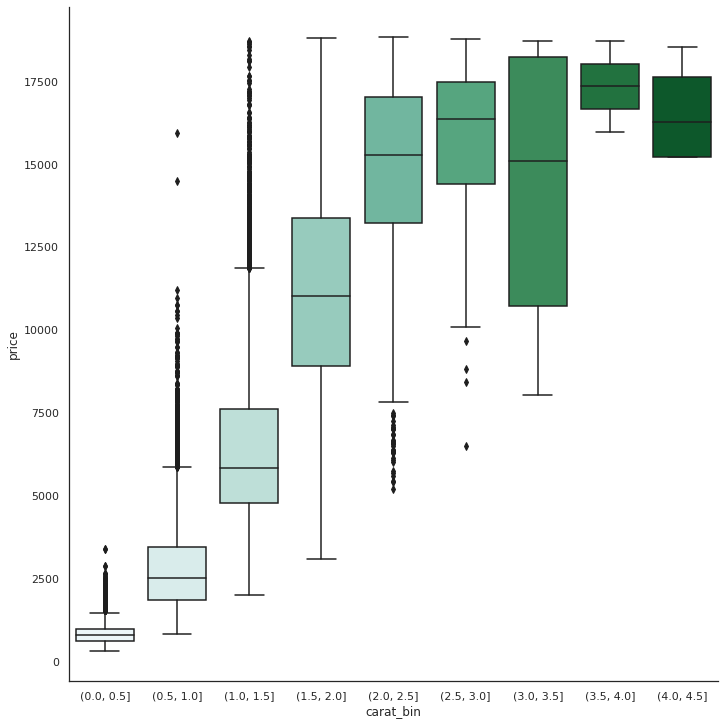

In [129]:
sns.catplot(x = 'carat_bin', y='price', kind='box', data=diamonds, height=10, palette='BuGn');

**Apparently, on average, Fair cut diamonds have a higher price than Good and Very Good cut diamonds, maybe higher carats? or better colour or clarity?**

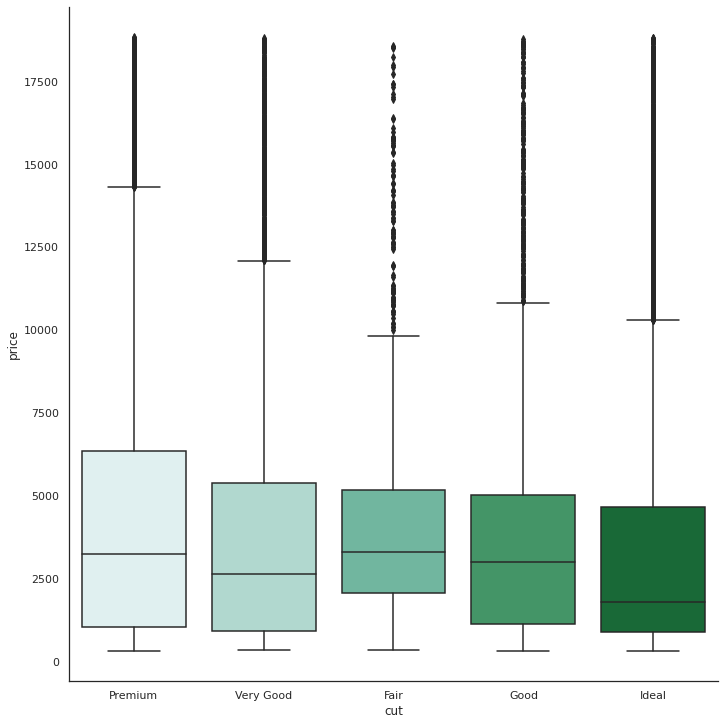

In [133]:
sns.catplot(x = 'cut', y='price', kind='box', data=diamonds, height=10, palette='BuGn');

**There are few diamonds with a Fair Cut compared to other diamonds, so data might be blurry, as we've seen before**

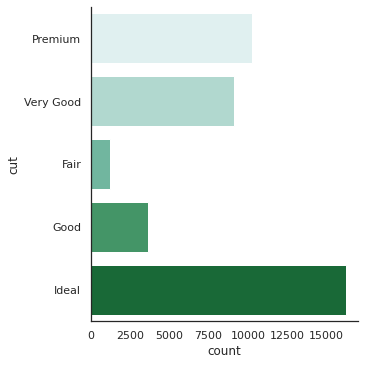

In [108]:
sns.catplot(y='cut', data=diamonds, kind='count', palette='BuGn');

**Prices depending on other characteristics:**

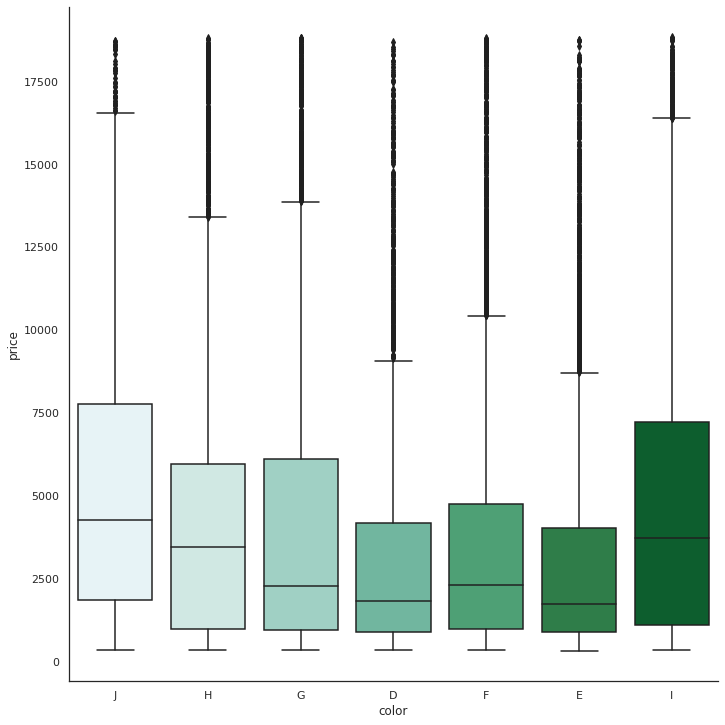

In [131]:
sns.catplot(x = 'color', y='price', kind='box', data=diamonds, height=10, palette='BuGn');

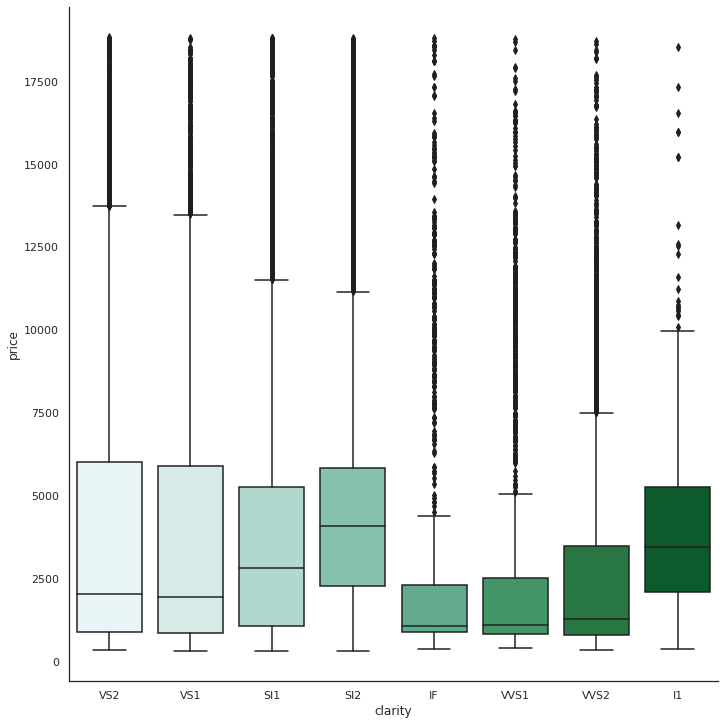

In [134]:
sns.catplot(x = 'clarity', y='price', kind='box', data=diamonds, height=10, palette='BuGn');

**Scatterplots according to carats and price and separated by other characteristics:**

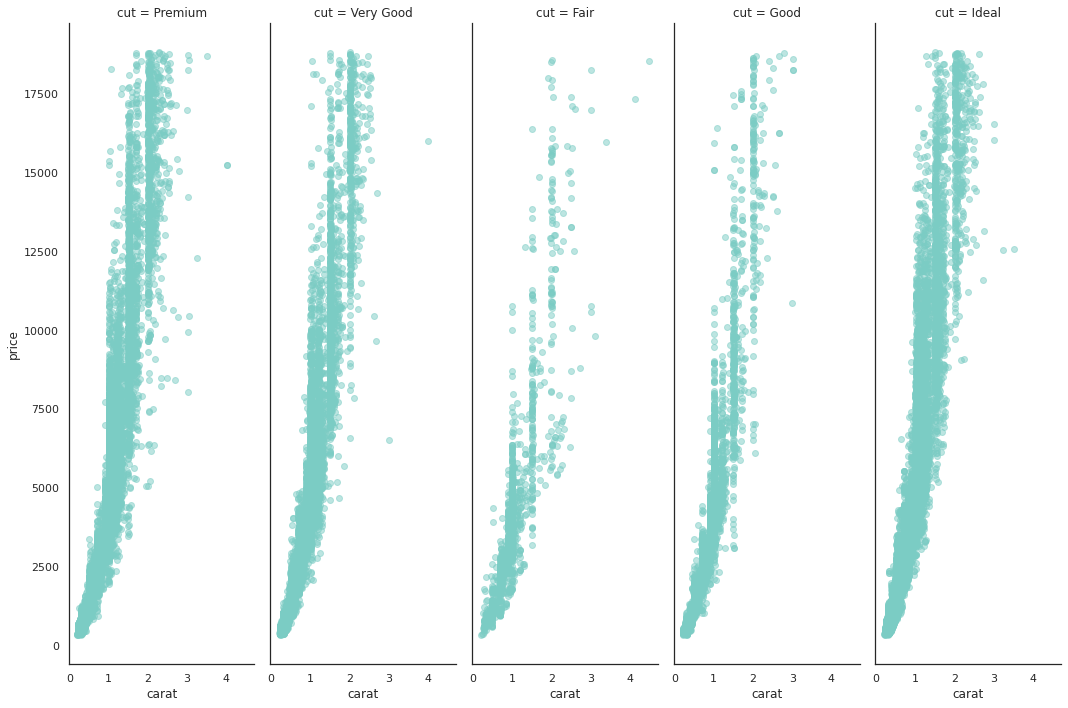

In [112]:
g = sns.FacetGrid(diamonds, col='cut',  palette='BuGn', aspect=0.3, height=10)
g.map(plt.scatter, 'carat',"price", alpha=.5, color='#7bccc4');

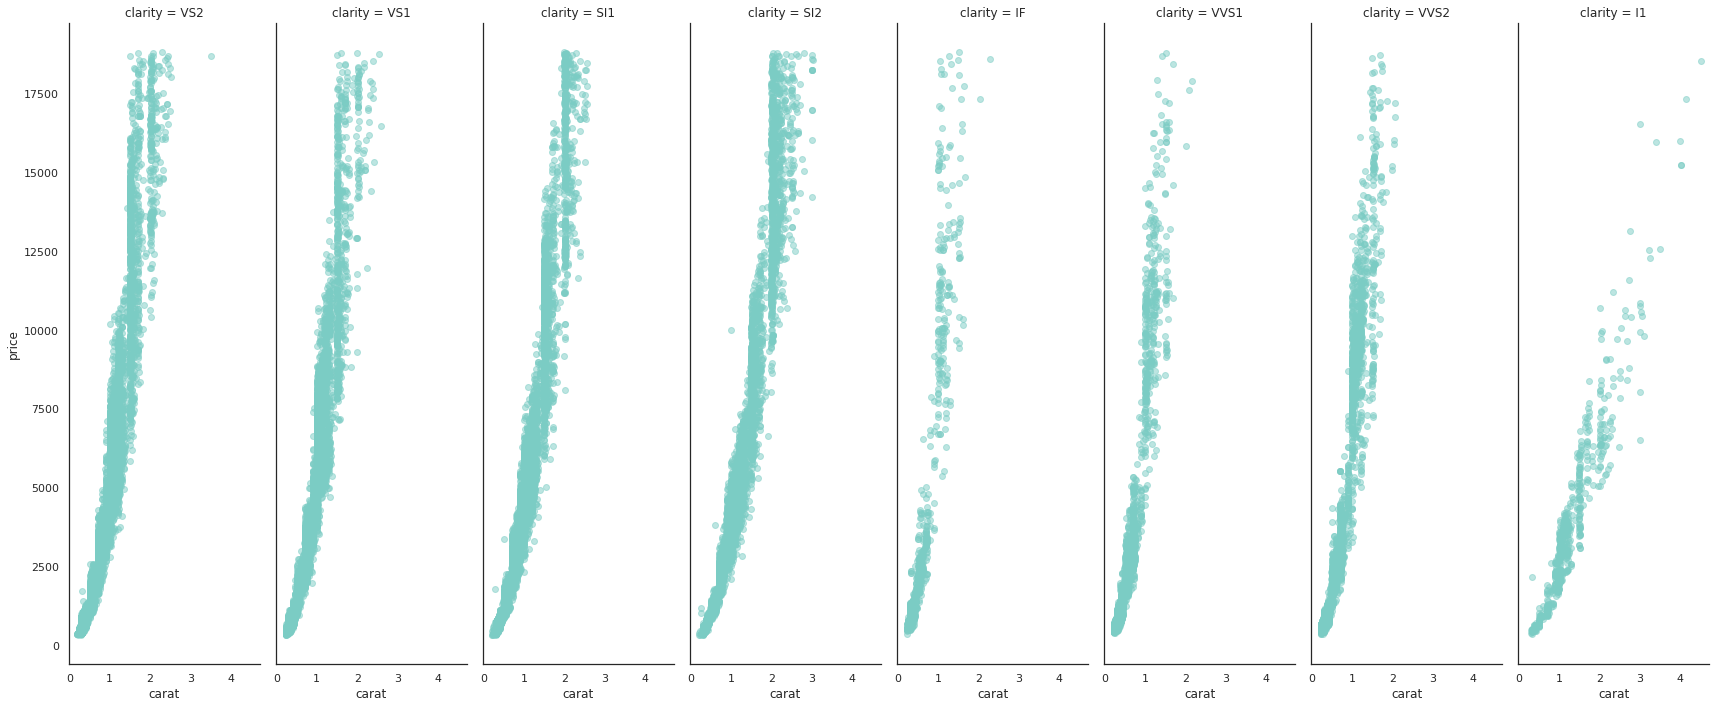

In [113]:
g = sns.FacetGrid(diamonds, col='clarity',  palette='BuGn', aspect=0.3, height=10)
g.map(plt.scatter, 'carat',"price", alpha=.5, color='#7bccc4');

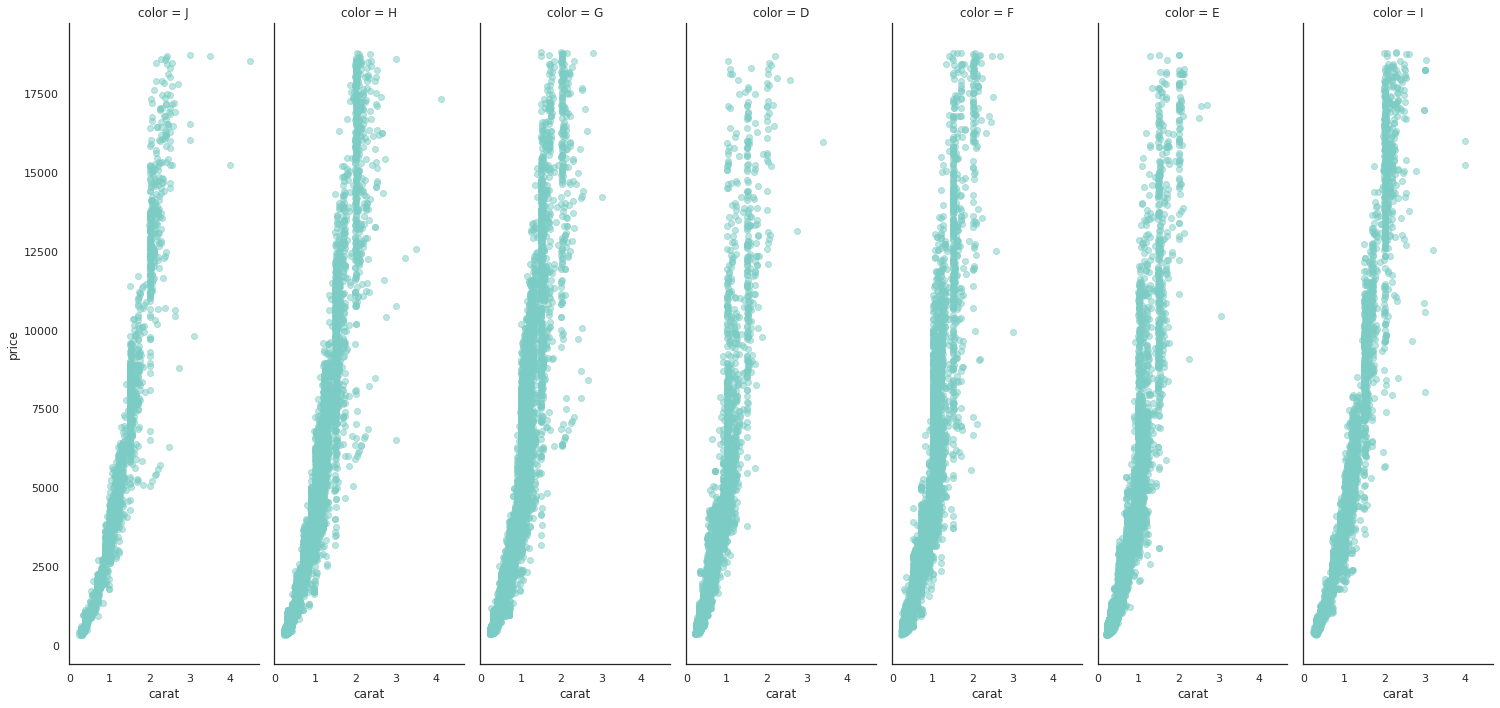

In [114]:
g = sns.FacetGrid(diamonds, col='color',  palette='BuGn', aspect=0.3, height=10)
g.map(plt.scatter, 'carat',"price", alpha=.5, color='#7bccc4');

# Bonus Challenge: Hypothesis Testing

## Test 1

In [163]:
prices = diamonds['price'].tolist()

ttest_1samp(prices, 4000)

Ttest_1sampResult(statistic=-3.604902369125729, pvalue=0.00031264532833074845)

**p-value is really small in this case, so we reject the Null Hypothesis and accept the Hypothesis that the average price of diamonds is 4000 USD**

## Test 2

### **Sub-Test 1: Fair cut + color G vs. Fair cut + color I**

In [145]:
group_1 = diamonds['price'][(diamonds['cut'] == 'Fair') & (diamonds['color'] == 'G')].tolist()
group_2 = diamonds['price'][(diamonds['cut'] == 'Fair') & (diamonds['color'] == 'I')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=0.03626636629279179, pvalue=0.9710929771417586)

**p-value is very high, so we accept the Null Hypothesis that color G and I have similar price**

### **Sub-Test 2: Good cut + color E vs. Good cut + color F**

In [158]:
group_1 = diamonds['price'][(diamonds['cut'] == 'Good') & (diamonds['color'] == 'E')].tolist()
group_2 = diamonds['price'][(diamonds['cut'] == 'Good') & (diamonds['color'] == 'F')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=-0.4406178833837438, pvalue=0.6595600994188809)

**p-value is very high, so we accept the Null Hypothesis that color E and F have similar price**

### **Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E**

In [159]:
group_1 = diamonds['price'][(diamonds['cut'] == 'Ideal') & (diamonds['color'] == 'D')].tolist()
group_2 = diamonds['price'][(diamonds['cut'] == 'Ideal') & (diamonds['color'] == 'E')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=-0.5376051381964381, pvalue=0.590875060001048)

**p-value is very high, so we accept the Null Hypothesis that color D and E have similar price**

### **Sub-Test 4: Premium cut + color D vs. Premium cut + color E**

In [160]:
group_1 = diamonds['price'][(diamonds['cut'] == 'Premium') & (diamonds['color'] == 'D')].tolist()
group_2 = diamonds['price'][(diamonds['cut'] == 'Premium') & (diamonds['color'] == 'E')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=0.4238712765446736, pvalue=0.6716959865958436)

**p-value is very high, so we accept the Null Hypothesis that color D and E have similar price**

### **Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J**

In [161]:
group_1 = diamonds['price'][(diamonds['cut'] == 'Very Good') & (diamonds['color'] == 'I')].tolist()
group_2 = diamonds['price'][(diamonds['cut'] == 'Very Good') & (diamonds['color'] == 'J')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=0.34857584108266776, pvalue=0.7274714598286438)

**p-value is very high, so we accept the Null Hypothesis that color I and J have similar price**

### **Sub-Test 6: All cuts + color D vs. All cuts + color E**

In [162]:
group_1 = diamonds['price'][(diamonds['color'] == 'D')].tolist()
group_2 = diamonds['price'][(diamonds['color'] == 'E')].tolist()

stats.ttest_ind(group_1, group_2, equal_var = False)

Ttest_indResult(statistic=0.7646978610927021, pvalue=0.44446798501477136)

**p-value is very high, so we accept the Null Hypothesis that color D and E have similar price**

## CONCLUSION

For what we've seen in these hypothesis testings, **color might not be a key factor** to determine the price of the diamond. 

We should compare other colors, but so far we've tested all different cuts and none of them seemed like the color had anything to do with the price.